## 데이터

In [1]:
import pandas

In [2]:
from sklearn.decomposition import PCA

In [3]:
import seaborn

In [4]:
wine = pandas.read_csv('wine.csv')

## PCA

In [7]:
p = PCA()

- 설명된 분산이 1이상인 축만 남긴다. 아래의 경우에는 3개만 남기면 됨 

In [ ]:
p.explained_variance_ # 13차원 

In [ ]:
pca = PCA(n_components=2) #2차원 데이터로 만들기 위해 컴포턴트 2 (원래 와인은 13 차원 -> 2차원)

In [ ]:
score = pca.fit_transform(wine.iloc[:, 1:])

In [ ]:
pca.explained_variance_ratio_ #설명된 분산의 비율 = r 제곱 (전체 분산 중에 몇%가 이 걸로 설명되느냐 )
# 첫번째 차원 99.8% , 두번째 차원 0.17% -> 거의 첫번째 차원만 보고 한 줄로 세울 수 있음 (첫번째 데이터만 있으면 나머지 99.8% 설명 가능 )
# ratio는 이것을 전체 분산으로 나눈 것 

### 시각화
- 표 형태로 변환하고 컬럼 이름을 comp1, comp2라고 붙인다
- wine의 종류(class) 정보를 가져와서 붙인다 
- wine 종류별로 색깔을 달리해서 2차원에 그려본다

In [ ]:
score_df = pandas.DataFrame(score, columns=['Comp1', 'Comp2'])

In [ ]:
score_df['Class'] = wine['Class']

In [ ]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Class', data=score_df, palette=['r', 'g', 'b'])

# 정규화 후 pca

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
x=scale.fit_transform(wine.iloc[:,1:]) # fit : 파라미터 추정, transfrom: 변환 -> 축소된 차원 점수 

# PCA

In [ ]:
sp = PCA(n_components=2)

In [ ]:
score2 = sp.fit_transform(x) # fit : 파라미터 추정(컴포넌트 찾기), transfrom: 변환 -> 축소된 차원 점수 

### 위의 과정은 다음과 같이 나눠서 할 수도 있다. 만약 새로운 와인 데이터를 구했다면 transform만 실시 

In [ ]:
sp.fit(x)
score2 = sp.transform(x)

In [ ]:
sp.explained_variance_ratio_ 

In [ ]:
score_df1 = pandas.DataFrame(score2, columns=['Comp1', 'Comp2'])

In [ ]:
score_df1['Class'] = wine['Class']

In [ ]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Class', data=score_df1, palette=['r', 'g', 'b'])
# 정규화 전보다 그림이 더 구분 잘 되게 나타남 

# 일차원 그래프로 만들기 

In [ ]:
import numpy
# c는 1부터 3까지 
for c in range(1,4):
    # wine의 class 컬럼에 따라 score를 뽑아낸다
    d = numpy.extract(wine['Class'] == c , score[:,0])
    # 해당 socre의 밀도를 시각화한다 
    seaborn.distplot(d, rug=True, hist=False)

In [ ]:
for c in range(1,4):
    d = score_df.query{f'Class == {c}'}['Comp1']
    seaborn.distplot(d, rug=True, hist=False)

### 실습: hsb2.csv
- 다섯 과목을 pca해서 2차원에 시각화하고, 성별(female)에 따라 시각화 해보세요

In [ ]:
hsb = pandas.read_csv('hsb2.csv')

In [ ]:
hsb.head()

In [ ]:
# 선생님 풀이 

In [ ]:
pca = PCA(n_components=2)

In [ ]:
hsb.iloc[:,6:]
# 다른 방법 : hsb[['read','wirte','math','science','socst']]

In [ ]:
score = pca.fit_transform(hsb.iloc[:,6:])

In [ ]:
pca.explained_variance_ratio_

In [ ]:
score_df= pandas.DataFrame(score, columns=['Comp1','Comp2'])

In [ ]:
score_df['female']=hsb['female']

In [ ]:
seaborn.scatterplot('Comp1','Comp2', hue='female', data=score_df,  palette=['r', 'g' ])

In [ ]:
# 내 풀이 

In [ ]:
hsb1 = hsb.fit_transform(x)

In [ ]:
hsb.explained_variance_ratio_

In [ ]:
hsb2 = pandas.DataFrame(hsb1, columns=['Comp1', 'Comp2'])

In [ ]:
hsb2.head()

In [ ]:
hsb2['Class'] = hsb['female']

In [ ]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Class', data=hsb2, palette=['r', 'b'])

## NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
score = nmf.fit_transform(hsb[['read', 'write', 'math', 'science', 'socst']])

In [ ]:
score #무조건 양수로 나옴 

In [ ]:
nmf.reconstruction_err_
# 재구성할때의 오류 (원 데이터를 재구성할 때 오차가 이 만큼 난다.) 
# (score @ nmf.components_ 값 에서 - hsb[['read', 'write', 'math', 'science', 'socst']**2).sum() 식으로 구성 가능 

In [ ]:
nmf.components_
# 첫번째 행 : 컴포넌트 1 - 순서대로 read, write, math, science, socst 인데 컴프1은 공동적으로 영향을 미친다
# 두번째 행 : 컴포넌트 2 - science는 compo2에 전혀 영향을 미치지 않는다, 사회에 굉장히 영향을 미침 (+이기 때문에 큰 숫자일수록 영향을 많이 미친다)
# 1행 과목 값*comp1 값 + 1행 과목 값*comp2의 값 => 원 점수 복원값 

In [ ]:
hsb.head()

In [ ]:
score @ nmf.components_ # @ : 행렬의 곱셈
# score값과 계수 값을 곱하면 나오는 거 -> hab.head 에서 보듯이 비슷하게 복원되어서 나옴 

### 실습: med.csv

In [ ]:
med = pandas.read_csv('med.csv')
med.head()

In [ ]:
med.isnull().sum()

### imputation : 경측된 값 예측 + 채워넣는
### listwise deletion : 통째로 ( 행 단위로) 지우기 
- 장점 : 쉽다 (그냥 지우면 되니까) 
- 단점 : 이유 있시 결측된 값들은..? 

In [ ]:
# med.dropna(axis = 0) #nan 값 삭제하기 
# med.isnull().sum()

In [ ]:
nmf = NMF(n_components=2)
score = nmf.fit_transform(med.iloc[:,4:11])

In [ ]:
nmf.reconstruction_err_

In [ ]:
nmf.components_

In [ ]:
# 선생님 방식 
med.dropna(inplace=True) #med에서 빈 값이 있는 행을 없애고 다시 med에 덮어쓴다 
nmf = NMF(n_components=2)
score = nmf.fit_transform(med.iloc[:,4:11])
nmf.components_

In [ ]:
# 지능검사 데이터 
test1 = pandas.read_csv('test1.csv')
test1.head()

In [ ]:
nmf = NMF(n_components=3) # 시각, 언어, 수치 적인거 3가지쯤 되겠다
score = nmf.fit_transform(test1)
score

In [ ]:
nmf.reconstruction_err_

In [ ]:
nmf.components_

### 컴포넌트 개수는 어떻게 정해야하는 가? 
- 일단 pca 할 때 표준화를 한번 하기 
- 1보다 큰 값들을 세기 (통상적인 기준) -> 설명되는 분산이 1보다 큰 게 몇개냐, 그래서 그 개수로 정하기 

In [ ]:
pca = PCA()

In [ ]:
scale=StandardScaler()
x = scale.fit_transform(test1)

In [ ]:
pca.fit(x)

In [ ]:
pca.explained_variance_ 
# 1보다 큰 애들 3개  -> 그래서 컴포넌트 3 (n_components=3)

## 요인 분석

### 설치

In [ ]:
# !pip install factor_analyzer

### 탐색적 요인 분석

In [ ]:
# test1 = 지능검사 데이터
test1 = pandas.read_csv('test1.csv')

In [ ]:
test1.head()

### 요인 수

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 요인 = comp(컴포넌트) 다 같은 말 
pc = PCA()

In [ ]:
std = StandardScaler()
x = std.fit_transform(test1)

In [ ]:
pc.fit(x)

In [ ]:
pc.explained_variance_

### 요인분석

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
fa = FactorAnalyzer(n_factors=3, method='ml', rotation=None) 
# n_facotrs = n_components
# method ='ml' 기본값 (그냥 해주세요,,,)
# rotation(회전) = 지금은 안하고 돌림 (none)

In [ ]:
test1.head()

In [ ]:
fa.fit(test1)

In [ ]:
fa.loadings_ #.components_ 같은 말 == 계수 - rotation을 안 해서 지금 +- 섞여있고 해석하기 어려움 

In [ ]:
fa.get_communalities() # 우리가 봐야하는 중요한 값! communalities 
# 비쥬얼, 큐브, 로직, 컴프리헨션 ...컬럼명들의 데이터에서 이 요인들이 분산의 몇 %를 설명하느냐가 중요 

In [ ]:
fa.get_uniquenesses() #요인들의 유니크한 부분 

In [ ]:
fa.get_eigenvalues()

### 회전

In [ ]:
fa = FactorAnalyzer(n_factors=3, method='ml', rotation='promax')

In [ ]:
fa.fit(test1)

In [ ]:
fa.phi_ #요인간 상관 행렬

### 확인적 요인분석

In [ ]:
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser

#### 모형

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_test = pandas.DataFrame(x, columns=test1.columns)

In [ ]:
model_dict = {
    '시각': ['Visual', 'Cubes', 'Lozenges'], # 미리 이름 붙이기 : 시각
    '언어': ['Comprehension', 'Completion', 'Word'], # 언어
    '수리': ['Addition', 'Counting', 'Curve'] # 수리
}

In [ ]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(
    std_test,
    model_dict)

#### 분석

In [ ]:
cfa = ConfirmatoryFactorAnalyzer(model_spec)

In [ ]:
cfa.fit(std_test)

In [ ]:
cfa.loadings_
# 요인 1, 요인 2, 요인 3이 각각 영향을 미친다는 가정에 맞게 계수를 추정해줌 

In [ ]:
cfa.factor_varcovs_

#### 적합도

In [ ]:
cfa.aic_

In [ ]:
cfa.bic_

## 다차원척도법

### 데이터 준비

In [16]:
import numpy

In [45]:
df = pandas.DataFrame(
    [
        ['A', 'B', 3],
        ['A', 'C', 4],
        ['B', 'C', 5],
    ])
# 3가지 제품과의 관계, 거리 
df

,0,1,2
0,A,B,3
1,A,C,4
2,B,C,5


In [18]:
distance = numpy.zeros((3, 3)) #가로 3, 세로 3 으로 모두 0인 행렬을 만든다 
product_id = {'A': 0, 'B': 1, 'C': 2} # 행 순서 지정 

In [19]:
for i, row in df.iterrows(): #iterrow: df에서 한 행씩 처리 
    p1 = row[0]
    i1 = product_id[p1]
    
    p2 = row[1]
    i2 = product_id[p2]
    
    distance[i1, i2] = row[2]    

In [29]:
distance # a에서의 거리 , b에서의 거리, c에서의 거리 

array([[ 0., 12., 16.],
       [12.,  0., 20.],
       [16., 20.,  0.]])

In [30]:
distance = distance + distance.T  #.t(행렬 뒤집은 거)

In [31]:
distance

array([[ 0., 24., 32.],
       [24.,  0., 40.],
       [32., 40.,  0.]])

### 분석

In [32]:
import seaborn

In [33]:
from sklearn.manifold import MDS

In [34]:
mds = MDS(metric=False, dissimilarity='precomputed')

In [35]:
pos = mds.fit_transform(distance)

In [36]:
pos

array([[ 0.29334393, -0.038196  ],
       [ 0.03865114,  0.40642622],
       [-0.33199506, -0.36823022]])

### 시각화

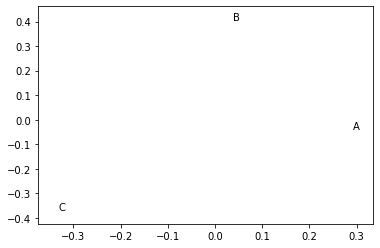

In [37]:
plt = seaborn.scatterplot(pos[:, 0], pos[:, 1], color='white')
for i, label in enumerate(['A', 'B', 'C']):
    plt.text(pos[i, 0], pos[i, 1], label)
# 거리 위치를 만족하는 좌표가 여러개 있기 때문에, 할 때마다 좌표는 다 다르게 나옴 

### mds는 적은 개수의 제품(한 10개 이하 정도) 일 때 두개의 유사도를 짝지어서 시각화 할 때 쓸 수 있다 

### 실습

- 스타벅스
- 할리스
- 이디야
- 투썸

In [46]:
df = pandas.DataFrame(
    [
        ['스타벅스', '할리스', 3.5],
        ['스타벅스', '이디야', 4.5],
        ['스타벅스', '투썸', 2.2],
        ['할리스', '이디야', 3.3],
        ['할리스', '투썸', 1.2],
        ['이디야', '투썸', 4.8],
        
    ])
# 1: 아주 비슷하다 5: 전혀 비슷하지 않다
df

,0,1,2
0,스타벅스,할리스,3.5
1,스타벅스,이디야,4.5
2,스타벅스,투썸,2.2
3,할리스,이디야,3.3
4,할리스,투썸,1.2
5,이디야,투썸,4.8


In [41]:
distance = numpy.zeros((4, 4))
product_id = {'스타벅스': 0, '할리스': 1, '이디야': 2, '투썸':3}

In [42]:
for i, row in df.iterrows():
    p1 = row[0]
    i1 = product_id[p1]
    
    p2 = row[1]
    i2 = product_id[p2]
    
    distance[i1, i2] = row[2]  

In [44]:
distance #스타벅스, 할리스, 이디야, 투썸

array([[0. , 3.5, 4.5, 2.2],
       [0. , 0. , 3.3, 1.2],
       [0. , 0. , 0. , 4.8],
       [0. , 0. , 0. , 0. ]])

In [47]:
distance = distance + distance.T #.t(뒤집은거)
distance

array([[0. , 3.5, 4.5, 2.2],
       [3.5, 0. , 3.3, 1.2],
       [4.5, 3.3, 0. , 4.8],
       [2.2, 1.2, 4.8, 0. ]])

In [48]:
mds = MDS(metric=False, dissimilarity='precomputed')

In [49]:
pos = mds.fit_transform(distance)

In [50]:
pos

array([[-0.39257061,  0.195257  ],
       [-0.00858912, -0.068494  ],
       [ 0.23343041, -0.53714786],
       [ 0.17024435,  0.43165065]])

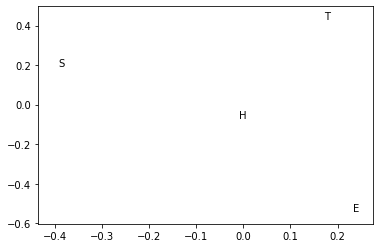

In [52]:
plt = seaborn.scatterplot(pos[:, 0], pos[:, 1], color='white')
for i, label in enumerate(['S', 'H', 'E', 'T']):
    plt.text(pos[i, 0], pos[i, 1], label)

# 차원 축소인 이유 
- 거리를 구하는 거기 때문에 2차원으로 좁힐 수 있음 